In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

# Data Pre-processing/Transformation

In [6]:
emp=pd.read_excel('C:/datascience/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')


In [7]:
emp.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### Make a copy of the original data

In [8]:
emp_new=emp.copy()

In [9]:
emp_new.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [10]:
emp_original=emp_new.copy()

In [11]:
emp_original.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### Check for NaN

In [12]:
nan_rows=emp_new[emp_new.isnull().any(1)]

In [13]:
nan_rows

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


##### Since the data is clean, without any NaNs, we will continue to use the 'emp'

In [14]:
emp.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [15]:
emp.dtypes.index

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

### Identifying data that is influencing performance

In [16]:
emp['Attrition'].value_counts()

No     1022
Yes     178
Name: Attrition, dtype: int64

In [17]:
emp.groupby('Attrition').mean()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
Attrition,,,,,,,,,,,,,,,,,,,
No,37.636008,8.950098,2.913894,2.772016,66.203523,2.776908,2.148728,2.770059,2.626223,15.236791,2.741683,11.932485,2.804305,2.764188,7.448141,4.553816,2.271037,4.339530,2.956947
Yes,32.797753,10.404494,2.769663,2.393258,64.707865,2.471910,1.601124,2.516854,2.887640,15.140449,2.629213,7.870787,2.679775,2.629213,4.949438,2.786517,1.752809,2.758427,2.898876


In [18]:
emp.groupby('EmpDepartment').mean()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
EmpDepartment,,,,,,,,,,,,,,,,,,,
Data Science,38.000000,9.650000,2.750000,2.950000,62.250000,2.900000,2.100000,2.700000,2.100000,16.450000,2.500000,12.100000,2.950000,2.500000,5.850000,3.000000,1.550000,3.800000,3.050000
Development,36.653740,8.789474,2.853186,2.709141,65.828255,2.789474,1.939058,2.747922,2.817175,15.204986,2.833795,11.008310,2.756233,2.686981,6.725762,4.036011,2.041551,3.958449,3.085873
Finance,36.387755,11.877551,3.061224,2.836735,66.693878,2.877551,1.938776,2.653061,2.306122,15.367347,2.693878,10.877551,2.836735,2.673469,7.204082,4.693878,1.959184,4.428571,2.775510
Human Resources,38.425926,8.666667,3.000000,2.629630,65.703704,2.777778,2.055556,2.555556,3.129630,14.740741,2.888889,11.851852,2.574074,2.925926,7.425926,3.574074,1.814815,3.888889,2.925926
Research & Development,37.475219,9.230321,2.874636,2.775510,67.023324,2.685131,1.997085,2.720117,2.693878,15.300292,2.615160,11.746356,2.784257,2.743440,6.988338,4.306122,2.244898,4.029155,2.921283
Sales,36.455764,9.160858,2.916890,2.651475,65.319035,2.683646,2.273458,2.766756,2.501340,15.152815,2.713137,11.201072,2.831099,2.796247,7.498660,4.646113,2.415550,4.321716,2.860590


## Data Visualisation

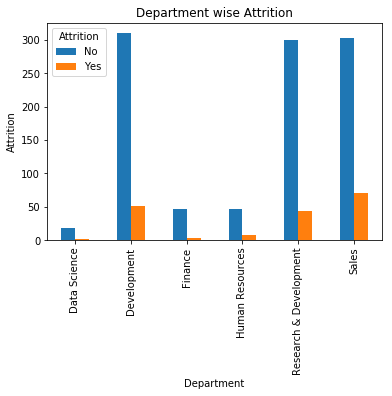

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(emp.EmpDepartment,emp.Attrition).plot(kind='bar')
plt.title('Department wise Attrition')
plt.xlabel('Department')
plt.ylabel('Attrition')
plt.savefig('department_bar_chart')

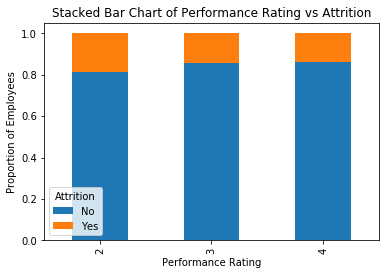

In [20]:
table=pd.crosstab(emp.PerformanceRating, emp.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Performance Rating vs Attrition')
plt.xlabel('Performance Rating')
plt.ylabel('Proportion of Employees')
plt.savefig('PerfRating_bar_chart')

##### Data analysis from above visualisation
- Top performers belong to the departments: Development, Human Resources and Research & Development
- Ignoring Data Science department since the number of employees is comparitively very less

### Histogram of variables

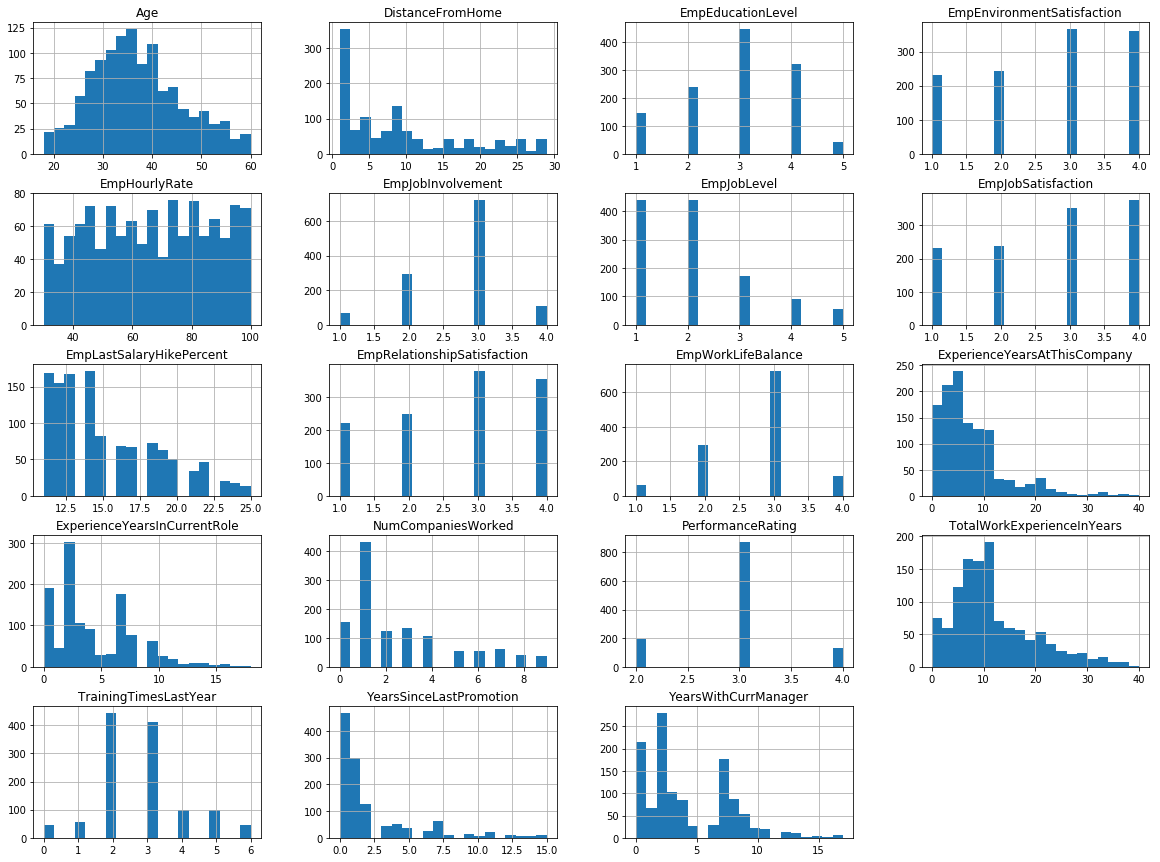

In [21]:
num_bins = 20

emp.hist(bins=num_bins, figsize=(20,15))
plt.savefig("Emp_histogram_plots")
plt.show()

### Dropping columns that are not required for our analysis

In [22]:
emp_new.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [23]:
emp_new=emp_new.drop('EmpNumber', axis=1)
emp_new.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


### Creating Dummy Variables for all Categorical Variables

In [24]:
emp_data=pd.get_dummies(emp_new,drop_first=True)
emp_data.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_Yes,Attrition_Yes
0,32,10,3,4,55,3,2,4,1,12,...,1,0,0,0,0,0,0,1,0,0
1,47,14,4,4,42,3,2,1,2,12,...,1,0,0,0,0,0,0,1,0,0
2,40,5,4,4,48,2,3,1,5,21,...,1,0,0,0,0,0,1,0,1,0
3,41,10,4,2,73,2,5,4,3,15,...,0,0,0,0,0,0,0,1,0,0
4,60,16,4,1,84,3,2,1,8,14,...,1,0,0,0,0,0,0,1,0,0


In [25]:
emp_data.columns.values

array(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating', 'Gender_Male',
       'EducationBackground_Life Sciences',
       'EducationBackground_Marketing', 'EducationBackground_Medical',
       'EducationBackground_Other',
       'EducationBackground_Technical Degree', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'EmpDepartment_Development',
       'EmpDepartment_Finance', 'EmpDepartment_Human Resources',
       'EmpDepartment_Research & Development', 'EmpDepartment_Sales',
       'EmpJobRole_Data Scientist', 'EmpJobRole_Delivery Manager

In [26]:
emp.drop(['EmpNumber','OverTime','Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','Attrition'], axis=1, inplace=True)
emp.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
0,32,10,3,4,55,3,2,4,1,12,4,10,2,2,10,7,0,8,3
1,47,14,4,4,42,3,2,1,2,12,4,20,2,3,7,7,1,7,3
2,40,5,4,4,48,2,3,1,5,21,3,20,2,3,18,13,1,12,4
3,41,10,4,2,73,2,5,4,3,15,2,23,2,2,21,6,12,6,3
4,60,16,4,1,84,3,2,1,8,14,4,10,1,3,2,2,2,2,3


## Choosing Features for analysis

In [27]:
INX = pd.merge(emp,emp_data)
INX.head()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,...,EmpJobRole_Sales Executive,EmpJobRole_Sales Representative,EmpJobRole_Senior Developer,EmpJobRole_Senior Manager R&D,EmpJobRole_Technical Architect,EmpJobRole_Technical Lead,BusinessTravelFrequency_Travel_Frequently,BusinessTravelFrequency_Travel_Rarely,OverTime_Yes,Attrition_Yes
0,32,10,3,4,55,3,2,4,1,12,...,1,0,0,0,0,0,0,1,0,0
1,47,14,4,4,42,3,2,1,2,12,...,1,0,0,0,0,0,0,1,0,0
2,40,5,4,4,48,2,3,1,5,21,...,1,0,0,0,0,0,1,0,1,0
3,41,10,4,2,73,2,5,4,3,15,...,0,0,0,0,0,0,0,1,0,0
4,60,16,4,1,84,3,2,1,8,14,...,1,0,0,0,0,0,0,1,0,0


In [28]:
INX.columns.values

array(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'PerformanceRating', 'Gender_Male',
       'EducationBackground_Life Sciences',
       'EducationBackground_Marketing', 'EducationBackground_Medical',
       'EducationBackground_Other',
       'EducationBackground_Technical Degree', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'EmpDepartment_Development',
       'EmpDepartment_Finance', 'EmpDepartment_Human Resources',
       'EmpDepartment_Research & Development', 'EmpDepartment_Sales',
       'EmpJobRole_Data Scientist', 'EmpJobRole_Delivery Manager

In [29]:
emp_vars=INX.columns.values.tolist()
emp_vars

['Age',
 'DistanceFromHome',
 'EmpEducationLevel',
 'EmpEnvironmentSatisfaction',
 'EmpHourlyRate',
 'EmpJobInvolvement',
 'EmpJobLevel',
 'EmpJobSatisfaction',
 'NumCompaniesWorked',
 'EmpLastSalaryHikePercent',
 'EmpRelationshipSatisfaction',
 'TotalWorkExperienceInYears',
 'TrainingTimesLastYear',
 'EmpWorkLifeBalance',
 'ExperienceYearsAtThisCompany',
 'ExperienceYearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceRating',
 'Gender_Male',
 'EducationBackground_Life Sciences',
 'EducationBackground_Marketing',
 'EducationBackground_Medical',
 'EducationBackground_Other',
 'EducationBackground_Technical Degree',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'EmpDepartment_Development',
 'EmpDepartment_Finance',
 'EmpDepartment_Human Resources',
 'EmpDepartment_Research & Development',
 'EmpDepartment_Sales',
 'EmpJobRole_Data Scientist',
 'EmpJobRole_Delivery Manager',
 'EmpJobRole_Developer',
 'EmpJobRole_Finance Manager',
 'EmpJobRole_Health

## Trying out different Machine Learning Algorithms

In [30]:
y=['PerformanceRating']
X=[i for i in emp_vars if i not in y]
print(INX[X])

      Age  DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0      32                10                  3                           4   
1      47                14                  4                           4   
2      40                 5                  4                           4   
3      41                10                  4                           2   
4      60                16                  4                           1   
5      27                10                  2                           4   
6      50                 8                  4                           4   
7      28                 1                  2                           1   
8      36                 8                  3                           1   
9      38                 1                  3                           3   
10     44                24                  3                           1   
11     47                 3                  3                  

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [32]:
model = LogisticRegression()

In [33]:
rfe = RFE(model, 20)

In [34]:
rfe = rfe.fit(INX[X], INX[y])

In [35]:
print(rfe.support_)
print(rfe.ranking_)

[False False False  True False False False False False False False False
 False  True False False False False False False False False  True False
 False False  True  True  True  True  True  True  True  True  True False
  True False  True False  True  True  True False  True  True False False
 False False False  True False]
[33 32 18  1 34 12  3 25 30 14 22 31 23  1 28 26 21 29 27  8 11  7  1  6
 16 24  1  1  1  1  1  1  1  1  1  5  1  2  1 20  1  1  1  9  1  1 10 15
 17 19  4  1 13]


In [36]:
x=INX.drop('PerformanceRating',axis=1)

In [37]:
y=INX.loc[:,['PerformanceRating']]

### Random Forest

In [38]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size = 0.3, random_state = 20)

In [39]:
rf_model =  RandomForestClassifier(random_state = 10)
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [40]:
y_pred=rf_model.predict(x_test)

In [41]:
print(accuracy_score(y_test,y_pred))

0.9083333333333333


### Logistic Regression

In [42]:
LogReg = LogisticRegression()
LogReg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
LogReg.score(x_train,y_train)

0.8357142857142857

In [44]:
y_pred = LogReg.predict(x_test)
print(y_test)
print(y_pred)

      PerformanceRating
296                   3
590                   3
439                   3
1040                  3
561                   2
664                   3
109                   3
287                   4
633                   2
41                    3
1100                  3
53                    3
526                   3
565                   3
506                   3
875                   4
479                   2
903                   3
376                   3
130                   3
58                    3
1187                  3
907                   3
487                   3
840                   3
952                   2
1158                  3
868                   3
1107                  3
142                   3
...                 ...
313                   3
687                   3
257                   3
1135                  2
1031                  3
1072                  3
825                   3
356                   3
534                   3
184             

In [45]:
accuracy_score(y_test,y_pred)

0.8194444444444444

### Decision Tree

In [46]:
tree = DecisionTreeClassifier(random_state=0)

In [47]:
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [48]:
print("Accuracy on training set: %f" % tree.score(x_train, y_train))
print('\n'"Accuracy on test set: %f" % tree.score(x_test, y_test))

Accuracy on training set: 1.000000

Accuracy on test set: 0.908333


### Support Vector Machine

In [49]:
from sklearn.metrics import accuracy_score
svc_linear = svm.SVC(kernel='linear',C=1)

svc_linear.fit(x_train, y_train)
predicted= svc_linear.predict(x_test)
cnf_matrix = confusion_matrix(y_test, predicted)
print(cnf_matrix)
print(accuracy_score(y_test,predicted))

[[ 29  20   0]
 [ 21 253   7]
 [  4   8  18]]
0.8333333333333334


### Cross Validation

In [50]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.880


##### The average accuracy is very close to the Random Forest model accuracy; Hence, we can conclude that the Random Forest model generalizes well.

## Deciding Features based on the outcome of Random Forest Model

In [51]:
feature_labels = np.array(['Age', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Gender_Male',
       'EducationBackground_Life Sciences',
       'EducationBackground_Marketing', 'EducationBackground_Medical',
       'EducationBackground_Other',
       'EducationBackground_Technical Degree', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'EmpDepartment_Development',
       'EmpDepartment_Finance', 'EmpDepartment_Human Resources',
       'EmpDepartment_Research & Development', 'EmpDepartment_Sales',
       'EmpJobRole_Data Scientist', 'EmpJobRole_Delivery Manager',
       'EmpJobRole_Developer', 'EmpJobRole_Finance Manager',
       'EmpJobRole_Healthcare Representative',
       'EmpJobRole_Human Resources', 'EmpJobRole_Laboratory Technician',
       'EmpJobRole_Manager', 'EmpJobRole_Manager R&D',
       'EmpJobRole_Manufacturing Director',
       'EmpJobRole_Research Director', 'EmpJobRole_Research Scientist',
       'EmpJobRole_Sales Executive', 'EmpJobRole_Sales Representative',
       'EmpJobRole_Senior Developer', 'EmpJobRole_Senior Manager R&D',
       'EmpJobRole_Technical Architect', 'EmpJobRole_Technical Lead',
       'BusinessTravelFrequency_Travel_Frequently',
       'BusinessTravelFrequency_Travel_Rarely', 'OverTime_Yes',
       'Attrition_Yes'])
importance = rf_model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

EmpJobRole_Delivery Manager-0.00%
EmpJobRole_Technical Architect-0.00%
EmpJobRole_Senior Manager R&D-0.00%
EmpJobRole_Research Director-0.08%
EmpJobRole_Manufacturing Director-0.13%
EmpJobRole_Laboratory Technician-0.16%
EmpJobRole_Healthcare Representative-0.16%
EmpJobRole_Human Resources-0.17%
EducationBackground_Other-0.17%
EmpJobRole_Finance Manager-0.17%
EmpDepartment_Finance-0.20%
EmpJobRole_Technical Lead-0.22%
EmpDepartment_Research & Development-0.24%
EmpJobRole_Sales Representative-0.26%
EducationBackground_Marketing-0.30%
EducationBackground_Technical Degree-0.32%
EmpJobRole_Manager R&D-0.35%
EmpJobRole_Data Scientist-0.38%
EmpJobRole_Manager-0.43%
EmpJobRole_Senior Developer-0.43%
EmpDepartment_Human Resources-0.43%
OverTime_Yes-0.67%
EmpJobRole_Sales Executive-0.67%
EmpJobRole_Research Scientist-0.68%
Attrition_Yes-0.73%
Gender_Male-0.77%
BusinessTravelFrequency_Travel_Rarely-0.84%
EmpDepartment_Sales-0.86%
MaritalStatus_Married-0.94%
MaritalStatus_Single-1.01%
BusinessTra

##### As seen above, the top features (displayed in ascending order) contributing to the performance of employees are:
- YearsSinceLastPromotion
- EmpLastSalaryHikePercent
- EmpEnvironmentSatisfaction